# Dependancies

In [5]:
# Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# Split Train and Score

In [8]:
def split(df, target):
    le = LabelEncoder()
    y = le.fit_transform(df[target])
    X = df.copy()
    X = X.drop(columns=target)

    return train_test_split(X, y)

In [10]:
def encode(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
    X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train), columns=ohe.get_feature_names_out())
    X_test_encoded = pd.DataFrame(data=ohe.transform(X_test), columns=ohe.get_feature_names_out())

    return X_train_encoded, X_test_encoded

In [12]:
def scale(X_train, X_test):
    scaler = StandardScaler()
    return scaler.fit_transform(X_train), scaler.fit_transform(X_test)

In [14]:
def metrics(X_train, X_test, y_train, y_test):
    
    lr_model = LogisticRegression(random_state=1, max_iter=110100100)
    lr_model.fit(X_train, y_train)

    lr_train_score = lr_model.score(X_train, y_train)
    lr_test_score = lr_model.score(X_test, y_test)

    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    
    svm_train_score = svm_model.score(X_train, y_train)
    svm_test_score = svm_model.score(X_test, y_test)
    
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    
    knn_train_score = knn_model.score(X_train, y_train)
    knn_test_score = knn_model.score(X_test, y_test)
    
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    
    dt_train_score = dt_model.score(X_train, y_train)
    dt_test_score = dt_model.score(X_test, y_test)
    
    rf_model = RandomForestClassifier(n_estimators=500, random_state=1)
    rf_model.fit(X_train, y_train)
    
    rf_train_score = rf_model.score(X_train, y_train)
    rf_test_score = rf_model.score(X_test, y_test)

    # etc = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
    # etc_train_score = etc.score(X_train_encoded, y_train)
    # etc_test_score = etc.score(X_test_encoded, y_test)

    # gbc = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)
    # gbc_train_score = gbc.score(X_train_encoded, y_train)
    # gbc_test_score = gbc.score(X_test_encoded, y_test)

    # abc = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)
    # abc_train_score = abc.score(X_train_encoded, y_train)
    # abc_test_score = abc.score(X_test_encoded, y_test)

    return [lr_train_score, lr_test_score, svm_train_score, svm_test_score, knn_train_score, knn_test_score, dt_train_score, dt_test_score, rf_train_score, rf_test_score]

In [16]:
x=['LogReg Train', 'LogReg Test', 
        'SVM Train', 'SVM Test', 
        'KNN Train', 'KNN Test', 
        'DT Train', 'DT Test', 
        'RF Train', 'RF Test']

In [18]:
def plotting(scores):
    plt.bar(x, scores)
    plt.ylim(min(scores)-(max(scores)-min(scores))*0.5, max(scores)+(max(scores)-min(scores))*0.1)
    plt.xticks(rotation=45)
    plt.xlabel='Classifiers'
    plt.ylabel='Score'
    plt.title('Scores for different classifiers')
    xlocs, xlabs = plt.xticks()
    xlocs=[i+1 for i in range(0,10)]
    for i, v in enumerate(scores):
        plt.text(xlocs[i]-1.25, v + (max(scores)-min(scores))*0.02, str(round(v,2)))
    plt.show()

# RUN

In [21]:
path = 'vertebral-column.csv'
target = 'class'

In [23]:
df = pd.read_csv(path)

In [25]:
X_train, X_test, y_train, y_test = split(df, target)
X_train_encoded, X_test_encoded = encode(X_train, X_test)
X_train_scaled, X_test_scaled = scale(X_train, X_test)

Do you want to use Scaled or Encoded data? 0 For Scaled 0


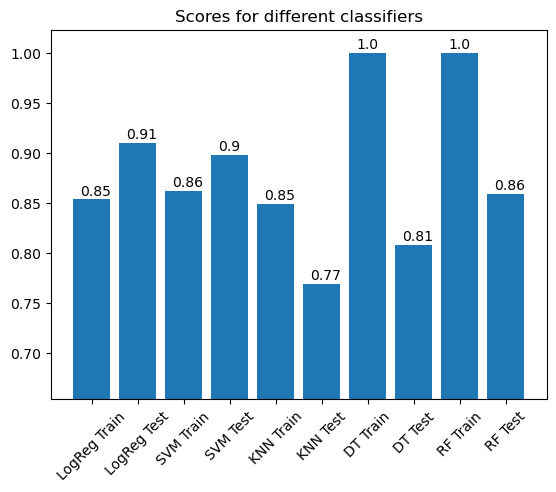

In [27]:
n = input('Do you want to use Scaled or Encoded data? 0 For Scaled')
if n == '0':
    scores = metrics(X_train_scaled, X_test_scaled, y_train, y_test)
else:
    scores = metrics(X_train_encoded, X_test_encoded, y_train, y_test)
plotting(scores)